# <center> <u> Feature Selection </u> </center>

<h2>What's the Purpose of Feature Selection</h2>
<p>Many learning algorithms perform poorly on high-dimensional data. This is known as the <b>curse of dimensionality</b>
    <p>There are other reasons we may wish to reduce the number of features including:
        <p>1. Reducing computational cost
            <p>2. Reducing the cost associated with data collection
                <p>3. Improving Interpretability

Full playlist link of feature selection assignment videos : https://youtube.com/playlist?list=PLsR_0x6BuM-EQWyq_1CQqhlbnY0pvC_ew

{Use it if any video throw error, else go stepwise videos embedded}

## **`Video 1: Feature Selection Techniques`**

File used: https://drive.google.com/file/d/1no82-mhXD52sQEu6I7-I6K5HPyVBIBgz/view?usp=sharing

Dataset : https://drive.google.com/file/d/1g3rLZpYb9BmBElDq_fo7F2nzpBuzaQYB/view?usp=sharing

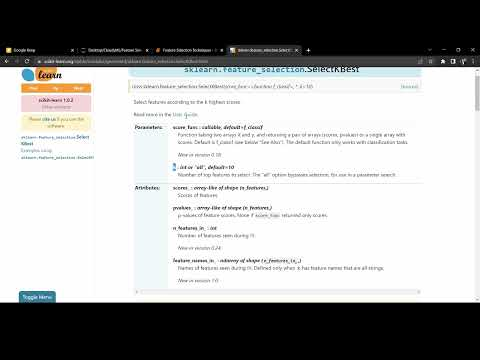

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('wWxTHm4kI3Y',width=700, height=400)

![image.png](attachment:image.png)

**Problem Statement:**

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [2]:
#import numpy, pandas 

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt

## 1.Filter Methods:



Filter method applies a statistical measure to assign a scoring to each feature.Then we can decide to keep or remove those features based on those scores. The methods are often univariate and consider the feature independently, or with regard to the dependent variable.

In this section we will cover below approaches:

1. Missing Value Ratio Threshold
2. Variance Threshold
3. $Chi^2$ Test
4. Anova Test

Download the dataset from https://github.com/arupbhunia/Data-Pre-processing/blob/master/datasets/diabetes.csv

Dataset used - diabetes.csv

Download instruction: go to the given link--->click raw button on top right corner---->Press Ctrl+S -->save it as .csv file.

## (a) Missing Value Ratio Threshold

<p style='text-align: right;'> 20 points</p>


Data Dict:
---

**Pregnancies:** Number of times pregnant <br>
**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test.<br>
**BloodPressure:** Diastolic blood pressure (mm Hg).<br>
**SkinThickness:** Triceps skin fold thickness (mm).<br>
**Insulin:** 2-Hour serum insulin (mu U/ml).<br>
**BMI:** Body mass index (weight in kg/(height in m)^2). <br>
**DiabetesPedigreeFunction:** A function which scores likelihood of diabetes based on family history<br>
**Age:** Age (years)<br>
**Outcome:** Class variable (0 or 1)




In [3]:
# create a data frame named diabetes and load the csv file

diabetes = pd.read_csv('/content/diabetes.csv')
#print the head 
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We know that some features can not be zero(e.g. a person's blood pressure can not be 0) hence we will impute zeros with nan value in these features.

Reference to impute: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.replace.html

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Glucose BloodPressure, SkinThickness, Insulin, and BMI features cannot be zero ,we will impute zeros with nan value in these features.
l = ['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI']
diabetes[l] = diabetes[l].replace({'0':np.nan, 0:np.nan})

In [6]:
#display the no of null values in each feature

diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Now let's see for each feature what is the percentage of having missing values.

In [7]:
len(diabetes)

768

In [8]:
#percentage of missing values for Glucose(sum null values , divide by length and multiply by 100)
print(((diabetes['Glucose'].isna().sum())/(len(diabetes)))*100)



0.6510416666666667


In [9]:
# calculate the percentage for Bloodpressure
print(((diabetes['BloodPressure'].isna().sum())/(len(diabetes)))*100)



4.557291666666666


In [10]:
# calculate the percentage for SkinThickness

print(((diabetes['SkinThickness'].isna().sum())/(len(diabetes)))*100)


29.557291666666668


In [11]:
# calculate the percentage for Insulin

print(((diabetes['Insulin'].isna().sum())/(len(diabetes)))*100)


48.69791666666667


In [12]:
# calculate the percentage for BMI

print(((diabetes['BMI'].isna().sum())/(len(diabetes)))*100)


1.4322916666666665


Hey can you see that a large number of data missing in SkinThickness and Insulin.

## **`Video 2: dropping nan in pandas`**

File used: https://drive.google.com/file/d/1xD7xnBXRYLGg5Qy8676lcj3QepoxmxMn/view?usp=sharing

Dataset: https://drive.google.com/file/d/18iVghbe09MKOMc49imA1Phuw-dNvMm4X/view?usp=sharing

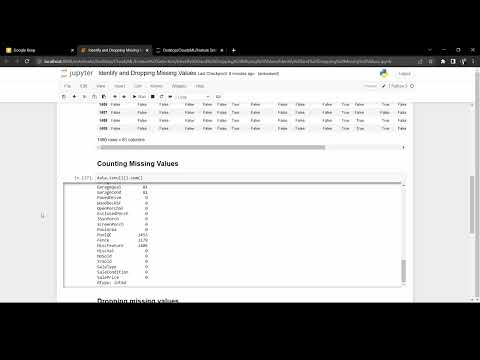

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('4vREg_89eNc',width=700, height=400)

Here we will keep only those features which are having missing data less than 10% as our threshold.


You can also check its document official: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [14]:
diabetes.shape[0]*.9

691.2

In [15]:
diabetes['Insulin'].isna().sum()

374

In [16]:
#we are keep only those features which are having missing data less than 10% 
diabetes_missing_value_threshold = diabetes.dropna(thresh=int(diabetes.shape[0]*.9),axis=1)


# print diabetes_missing_value_threshold 

diabetes_missing_value_threshold

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


Let's now Seperate the data diabetes_missing_value_threshold into features and labels 

Hey buddy! label is something which is depen'dent on other features for its outcome. You can also called it as our Target variable which we predict using ML algorithms.

Can you think which column would be considered as label.


In [17]:

diabetes_missing_value_threshold_features = diabetes_missing_value_threshold.drop('Outcome',axis=1)

diabetes_missing_value_threshold_label= diabetes_missing_value_threshold['Outcome']


In [18]:
#print diabetes_missing_value_threshold_features
diabetes_missing_value_threshold_features


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,33.6,0.627,50
1,1,85.0,66.0,26.6,0.351,31
2,8,183.0,64.0,23.3,0.672,32
3,1,89.0,66.0,28.1,0.167,21
4,0,137.0,40.0,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63
764,2,122.0,70.0,36.8,0.340,27
765,5,121.0,72.0,26.2,0.245,30
766,1,126.0,60.0,30.1,0.349,47


In [19]:
#print diabetes_missing_value_threshold_label
diabetes_missing_value_threshold_label



0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## (b) Variance Threshold

<p style='text-align: right;'> 20 points</p>

If the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the model. In that case, it should be removed.

Variance will also be very low for a feature if only a handful of observations of that feature differ from a constant value.


## **`Video 3: Dropping feature with low variance using variance threshold`**

File used: https://drive.google.com/file/d/1aF_h1juJT6wY49ijjLh-7cMFxMkbXkt-/view?usp=sharing

Dataset used: https://drive.google.com/file/d/1-Sx-VZwuUYH8O48aw5mWYEXPLrLRlKKK/view?usp=sharing

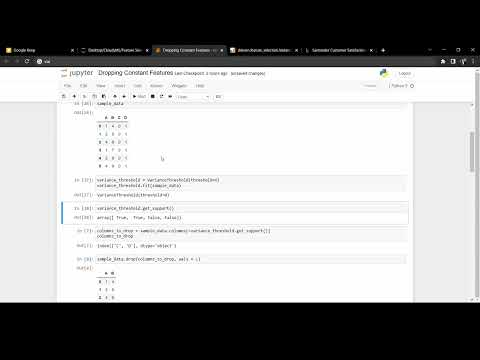

In [20]:
from IPython.display import YouTubeVideo
YouTubeVideo('eaR54q1Hvno',width=700, height=400)

Are you ready to implement feature selection using variance threshold? Smile and download the dataset diabetes_cleaned.csv from https://github.com/arupbhunia/Data-Pre-processing/blob/master/datasets/diabetes_cleaned.csv

Dataset used - diabetes_cleaned.csv

In [21]:
# load the csv to dataframe name "diabetes" and print the head values
diabetes = pd.read_csv('https://raw.githubusercontent.com/arupbhunia/Data-Pre-processing/master/datasets/diabetes_cleaned.csv')

# print head
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,218.937760,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.189298,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,269.968908,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [22]:
# seperate the features and the target as x and y 
X = diabetes.drop('Outcome',axis=1)
Y = diabetes['Outcome']

If you have seen the video then Krish must have told you to use sklearn library to calculate variance threshold. But we will use var function to calculate our variance so that you understand the concept from base. 

In [23]:
diabetes.var()

Pregnancies                   11.354056
Glucose                      929.680350
BloodPressure                146.321591
SkinThickness                 77.285567
Insulin                     9484.259268
BMI                           48.813618
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Outcome                        0.227483
dtype: float64

Hey smarty! did you see that DiabetesPedigreeFunction variance is less so it brings almost no information because it is (almost) constant , this can be a justification to remove DiabetesPedigreeFunction column but before considering this we should scale these features because they are of different scales.
    
Reference for minmax scaling: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Lets use sklearn minmax scaler here.


In [24]:
# import minmax_scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,10))
# use minmax scale with feature_range=(0,10) and columns=X.columns,to scale the features of dataframe and store them into X_scaled_df 
X_scaled_df = pd.DataFrame(scaler.fit_transform(X) , columns=X.columns)




Wait a minute! whats minmax scaling?

It is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]

hey hey heyieeee! Fun fact time:

There is another scaling method called StandardScaler which follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. 

Cool right? :)

In [25]:
# return X_scaled_df
X_scaled_df
 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3.529412,6.709677,4.897959,3.043478,2.740295,3.149284,2.344150,4.833333
1,0.588235,2.645161,4.285714,2.391304,1.018185,1.717791,1.165670,1.666667
2,4.705882,8.967742,4.081633,2.391304,3.331099,1.042945,2.536294,1.833333
3,0.588235,2.903226,4.285714,1.739130,1.293850,2.024540,0.380017,0.000000
4,0.000000,6.000000,1.632653,3.043478,2.150572,5.092025,9.436379,2.000000
...,...,...,...,...,...,...,...,...
763,5.882353,3.677419,5.306122,4.456522,2.289500,3.006135,0.397096,7.000000
764,1.176471,5.032258,4.693878,2.173913,2.044244,3.803681,1.118702,1.000000
765,2.941176,4.967742,4.897959,1.739130,1.502241,1.635992,0.713066,1.500000
766,0.588235,5.290323,3.673469,2.391304,2.217956,2.433538,1.157131,4.333333


In [26]:
# Again return  the variance for X along the specified axis=0 to check the scales after using minmax scaler.
X_scaled_df.var()



Pregnancies                 3.928739
Glucose                     3.869637
BloodPressure               1.523548
SkinThickness               0.913109
Insulin                     1.271218
BMI                         2.041377
DiabetesPedigreeFunction    2.001447
Age                         3.841751
dtype: float64

Now again you can check the previous video

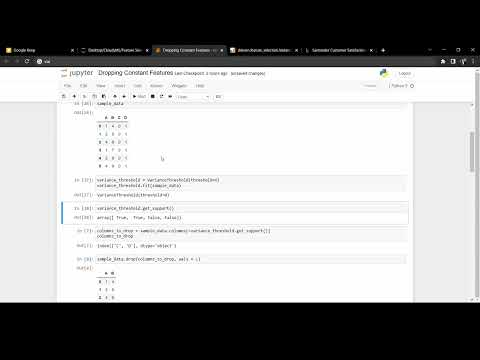

In [27]:
from IPython.display import YouTubeVideo
YouTubeVideo('eaR54q1Hvno',width=700, height=400)

In [28]:
# import variancethreshold

from sklearn.feature_selection import VarianceThreshold

# set threshold=1 and define it to variable select_features
select_features = VarianceThreshold(threshold=1)



   Impliment fit_transform on select_features passing X_scaled_df into it and save this result in variable X_variance_threshold_df


In [29]:
X_variance_threshold_df = select_features.fit_transform(X_scaled_df)


Were you thinking of fit_transform? We are here to help you understand

fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data

Don't worry you will get lot of challenges to use these things in our other assignments

In [30]:
#print X_variance_threshold_df
X_variance_threshold_df


array([[3.52941176, 6.70967742, 4.89795918, ..., 3.14928425, 2.3441503 ,
        4.83333333],
       [0.58823529, 2.64516129, 4.28571429, ..., 1.71779141, 1.16567037,
        1.66666667],
       [4.70588235, 8.96774194, 4.08163265, ..., 1.04294479, 2.53629377,
        1.83333333],
       ...,
       [2.94117647, 4.96774194, 4.89795918, ..., 1.63599182, 0.71306576,
        1.5       ],
       [0.58823529, 5.29032258, 3.67346939, ..., 2.43353783, 1.15713066,
        4.33333333],
       [0.58823529, 3.16129032, 4.69387755, ..., 2.49488753, 1.01195559,
        0.33333333]])

In [31]:
#Convert X_variance_threshold_df into dataframe
X_variance_threshold_df = pd.DataFrame(X_variance_threshold_df)


In [32]:
# print of head values of X_variance_threshold_df 
X_variance_threshold_df


,0,1,2,3,4,5,6
0,3.529412,6.709677,4.897959,2.740295,3.149284,2.344150,4.833333
1,0.588235,2.645161,4.285714,1.018185,1.717791,1.165670,1.666667
2,4.705882,8.967742,4.081633,3.331099,1.042945,2.536294,1.833333
3,0.588235,2.903226,4.285714,1.293850,2.024540,0.380017,0.000000
4,0.000000,6.000000,1.632653,2.150572,5.092025,9.436379,2.000000
...,...,...,...,...,...,...,...
763,5.882353,3.677419,5.306122,2.289500,3.006135,0.397096,7.000000
764,1.176471,5.032258,4.693878,2.044244,3.803681,1.118702,1.000000
765,2.941176,4.967742,4.897959,1.502241,1.635992,0.713066,1.500000
766,0.588235,5.290323,3.673469,2.217956,2.433538,1.157131,4.333333


Below mentioned is the function get_selected_features for returning selected_features to be used further 

In [33]:
X_scaled_df.iloc[:,1].equals(diabetes.iloc[:,1])

False

In [34]:
def get_selected_features(raw_df,processed_df):
    selected_features=[]
    for i in range(len(processed_df.columns)):
        for j in range(len(raw_df.columns)):
            if (processed_df.iloc[:,i].equals(raw_df.iloc[:,j])):
                selected_features.append(raw_df.columns[j])
    return selected_features

In [35]:
# pass the X_scaled_df as raw_df and X_variance_threshold_df as processed_df inside get_selected_features function
selected_features = get_selected_features(X_scaled_df , X_variance_threshold_df)

# print selected_features
selected_features



['Pregnancies',
 'Glucose',
 'BloodPressure',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Super! you can see SkinThickness feature is not selected as its variance is less.

Lets give column names to our X_variance_threshold_df

In [36]:
# define selected_features as columns and save it in variabe named X_variance_threshold_df
X_variance_threshold_df.columns = selected_features

#print X_variance_threshold_df
X_variance_threshold_df


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3.529412,6.709677,4.897959,2.740295,3.149284,2.344150,4.833333
1,0.588235,2.645161,4.285714,1.018185,1.717791,1.165670,1.666667
2,4.705882,8.967742,4.081633,3.331099,1.042945,2.536294,1.833333
3,0.588235,2.903226,4.285714,1.293850,2.024540,0.380017,0.000000
4,0.000000,6.000000,1.632653,2.150572,5.092025,9.436379,2.000000
...,...,...,...,...,...,...,...
763,5.882353,3.677419,5.306122,2.289500,3.006135,0.397096,7.000000
764,1.176471,5.032258,4.693878,2.044244,3.803681,1.118702,1.000000
765,2.941176,4.967742,4.897959,1.502241,1.635992,0.713066,1.500000
766,0.588235,5.290323,3.673469,2.217956,2.433538,1.157131,4.333333


## (c) Chi-Squared statistical test (SelectKBest)

<p style='text-align: right;'> 20 points</p>

Chi2 is a measure of dependency between two variables. It gives us a goodness of fit measure because it measures how well an observed distribution of a particular feature fits with the distribution that is expected if two features are independent.

Scikit-Learn offers a feature selection estimator named SelectKBest which select K numbers of features based on the statistical analysis.



Reference link: https://chrisalbon.com/machine_learning/feature_selection/chi-squared_for_feature_selection/

The below mentioned function generate_feature_scores_df is used to get feature score for using it in  Chi-Squared statistical test explained below

In [37]:
def generate_feature_scores_df(X,Score):
    feature_score=pd.DataFrame()
    for i in range(X.shape[1]):
        new =pd.DataFrame({"Features":X.columns[i],"Score":Score[i]},index=[i])
        feature_score=pd.concat([feature_score,new])
    return feature_score

Hey coder! lets use dataset - diabetes.csv from below link

https://github.com/arupbhunia/Data-Pre-processing/blob/master/datasets/diabetes.csv

In [38]:
# create a data frame named diabetes and load the csv file again
diabetes = pd.read_csv('https://raw.githubusercontent.com/arupbhunia/Data-Pre-processing/master/datasets/diabetes.csv')

In [39]:
# assign features to X variable and 'outcome' to y variable from the dataframe diabetes
X = diabetes.drop('Outcome' , axis=1)
Y = diabetes['Outcome']

Reference Doc: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [40]:
#import chi2 and SelectKBest
from sklearn.feature_selection import chi2 , SelectKBest


In [41]:
# converting data cast to a float type.
X = X.astype(int)

Lets use SelectKBest to calculate the best feature score. Use Chi2 as Score Function and no.of feature i.e. k as 4


In [42]:
# Initialise SelectKBest with above parameters 
chi2_test = SelectKBest(chi2 , k=4)

# and fit it with X and Y
chi2_model =chi2_test.fit(X,Y)


In [43]:
#print the scores of chi2_model
print(chi2_model.scores_)

[ 111.51969064 1411.88704064   17.60537322   53.10803984 2175.56527292
  128.51848129   13.12712293  181.30368904]


In [44]:
# use generate_feature_scores_df function to get features and their respective scores passing X and chi2_model.scores_ as paramter
feature_score_df = generate_feature_scores_df(X,chi2_model.scores_)



# return feature_score_df
feature_score_df


,Features,Score
0,Pregnancies,111.519691
1,Glucose,1411.887041
2,BloodPressure,17.605373
3,SkinThickness,53.108040
4,Insulin,2175.565273
5,BMI,128.518481
6,DiabetesPedigreeFunction,13.127123
7,Age,181.303689


Did you see the features and corresponding chi square scores? This is so easy right, higher the score better the feature. Just like higher the marks in assignment better the student of ours. 

In [45]:
##Lets get X to the selected features of chi2_model using tranform function so we will have X_new

X_new = chi2_model.transform(X)


whaaaat! tranform()? , how is it different from fit_transform.You know buddy fit() can also confuse you. Hey you inquisitive learner we will tell you the difference.

The fit() function calculates the values of these parameters. The transform function applies the values of the parameters on the actual data and gives the normalized value. The fit_transform() function performs both in the same step. Note that the same value is got whether we perform in 2 steps or in a single step.

for more info on this refer below video

## **`Video 4: fit vs fit_transform`**

File used: https://drive.google.com/file/d/1iD0XTSVo3DKdG5uO2H6MezvvmQ1TIm2B/view?usp=sharing

Dataset used: https://drive.google.com/file/d/1IIVkOAP6HYD4rQ-dqx7tRaVNCWxvxyE7/view?usp=sharing

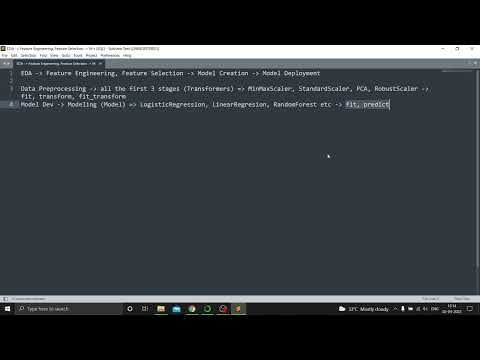

In [46]:
from IPython.display import YouTubeVideo
YouTubeVideo('LYnmWKW97CI',width=700, height=400)

In [47]:
# create a dataframe using X_new
X_new= pd.DataFrame(X_new)


In [48]:
#repeat the previous steps of calling get_selected_features function( pass X and X_new as score in the function)
selected_features = get_selected_features(X,X_new)

# return selected_features
selected_features


['Glucose', 'Insulin', 'BMI', 'Age']

Let have X with all features given in list selected_features and save this dataframe in variable chi2_best_features

In [49]:
# X with all features given in list selected_features 
chi2_best_features =pd.DataFrame(X, columns=selected_features)

# print chi2_best_features.head()
chi2_best_features.head()


,Glucose,Insulin,BMI,Age
0,148,0,33,50
1,85,0,26,31
2,183,0,23,32
3,89,94,28,21
4,137,168,43,33


As you can see chi-squared test helps us to select  important independent features out of the original features that have the strongest relationship with the target feature.

You did it well!

## (d) Anova-F Test

<p style='text-align: right;'> 20 points</p>

The F-value scores examine the varaiance by grouping the numerical feature by the target vector, the means for each group are significantly different.

## **`Video 5: One Way Anova or F-test`**

File used: https://drive.google.com/file/d/1myYGdzEfmUqoWc0A3YNuK0oaId1_CCnI/view?usp=sharing

Dataset used: https://drive.google.com/file/d/1g50xZ7xqzHaXNoh0KuUyAaaui7i5ud8n/view?usp=sharing


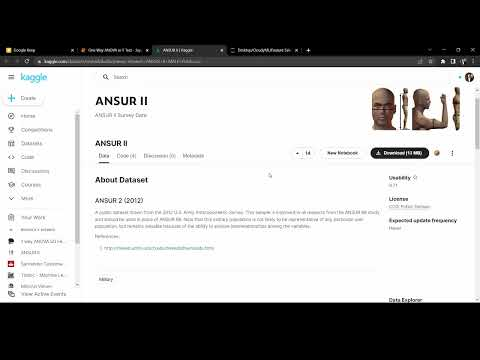

In [50]:
from IPython.display import YouTubeVideo
YouTubeVideo('jbH6rnOImoU',width=700, height=400)

In [51]:
#import libraries f_classif,SelectPercentile from sklearn

from sklearn.feature_selection import f_classif , SelectPercentile

# Initialise SelectPercentile function with parameters f_classif and percentile as 80
Anova_test = SelectPercentile(f_classif , percentile=80)

#Fit the above object to the features and target i.e X and Y
Anova_model= Anova_test.fit(X,Y)


here you have used f_classif for Anova-F test. To know more about this test you can check this artical.

https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476



In [52]:
# return scores of anova model
Anova_model.scores_


array([ 39.67022739, 213.16175218,   3.2569504 ,   4.30438091,
        13.28110753,  71.66429439,  12.3898467 ,  46.14061124])

In [53]:
# use generate_feature_scores_df function to get features and their respective scores by passing X and Anova_model.scores_ as score in function 
feature_scores_df = generate_feature_scores_df(X,Anova_model.scores_)
feature_scores_df


,Features,Score
0,Pregnancies,39.670227
1,Glucose,213.161752
2,BloodPressure,3.256950
3,SkinThickness,4.304381
4,Insulin,13.281108
5,BMI,71.664294
6,DiabetesPedigreeFunction,12.389847
7,Age,46.140611


In [54]:
# Get all supported columns values in Anova_model with indices=True
cols = Anova_model.get_support(indices=True)
# Reduce X to the selected features of anova model using tranform 
X_new = Anova_model.transform(X)




In [55]:
X_new

array([[  6, 148,   0,  33,   0,  50],
       [  1,  85,   0,  26,   0,  31],
       [  8, 183,   0,  23,   0,  32],
       ...,
       [  5, 121, 112,  26,   0,  30],
       [  1, 126,   0,  30,   0,  47],
       [  1,  93,   0,  30,   0,  23]])

In [56]:
list(X.iloc[:0,cols])

['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [57]:
#print X_new.head()
X_new = pd.DataFrame(X_new , columns=['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X_new

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33,0,50
1,1,85,0,26,0,31
2,8,183,0,23,0,32
3,1,89,94,28,0,21
4,0,137,168,43,2,33
...,...,...,...,...,...,...
763,10,101,180,32,0,63
764,2,122,0,36,0,27
765,5,121,112,26,0,30
766,1,126,0,30,0,47


Hey brighty! Hope you learned to implement Anova F-test method for feature selection. It has selected 6 best features as you can see in above output

# 2. Wrapper Methods

<p style='text-align: right;'> 30 points</p>


Wrapper methods are used to select a set of features by preparing where different combinations of features, then each combination is evaluated and compared to other combinations.Next a predictive model is used to assign a score based on model accuracy and to evaluate the combinations of these features.

In [58]:
# load and read the csv using pandas and print the head values
diabetes = pd.read_csv('/content/diabetes.csv')

# print head
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
# assign features to X and target 'outcome' to Y(Think why the 'outcome' column is taken as the target)
X = diabetes.drop('Outcome' , axis=1)
Y = diabetes['Outcome']

#return X,Y

print(X,Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


## (a) Recursive Feature Elemination

<p style='text-align: right;'> 25 points</p>

Recursive Feature Elimination selects features by recursively considering smaller subsets of features by pruning the least important feature at each step. Here models are created iteartively and in each iteration it determines the best and worst performing features and this process continues until all the features are explored.Next ranking is given on eah feature based on their elimination orde. In the worst case, if a dataset contains N number of features RFE will do a greedy search for $N^2$ combinations of features.


## **`Video 6: Recursive Feature Elimination`**

Note: the video is using random forest classifier, but we are going to use logistic regression as our model.

File used: https://drive.google.com/file/d/1NPomAlZP1g054xlRWUZ9_GE8pZxu2WFA/view?usp=sharing

Dataset used: https://drive.google.com/file/d/1WC4UwIx56Muc5lX3io7UJK_Is6gIv4tM/view?usp=sharing

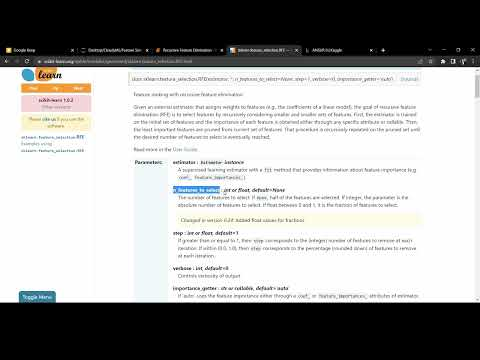

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('IyEJ92cOQXc',width=700, height=400)

In [65]:
# import required libraries RFE, LogisticRegression and dependencies
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression



In [67]:
# Initialise model variable with LogisticRegression function with solver = 'liblinear'
model = LogisticRegression(solver='liblinear')

# rfe variable has RFE instance with should have model and n_features_to_select=4 as parameters
rfe = RFE(estimator=model , n_features_to_select=4)



In [68]:
# fit rfe with X and Y
fit = rfe.fit(X,Y)

In [69]:
# print fit.n_features_, fit.support_, fit.ranking_
print("Number of selected features",fit.n_features_)
print("Selected Features",fit.support_)
print("feature rankings" ,fit.ranking_) 



Number of selected features 4
Selected Features [ True  True False False False  True  True False]
feature rankings [1 1 2 4 5 1 1 3]


In [70]:
# use below function to get ranks of all the features
def feature_ranks(X,Rank,Support):
    feature_rank=pd.DataFrame()
    for i in range(X.shape[1]):
        new =pd.DataFrame({"Features":X.columns[i],"Rank":Rank[i],'Selected':Support[i]},index=[i])
        feature_rank=pd.concat([feature_rank,new])
    return feature_rank


In [72]:
#Get all feature's ranks using feature_ranks function with suitable parameters in variable called feature_rank_df
feature_rank_df = feature_ranks(X,fit.ranking_,fit.support_)

# print feature_rank_df
feature_rank_df


,Features,Rank,Selected
0,Pregnancies,1,True
1,Glucose,1,True
2,BloodPressure,2,False
3,SkinThickness,4,False
4,Insulin,5,False
5,BMI,1,True
6,DiabetesPedigreeFunction,1,True
7,Age,3,False


We can see there are four features with rank 1 ,RFE states that these are the most significant features.

In [78]:
# filter feature_rank_df  with selected column values as True and save it variable called recursive_feature_names 
recursive_feature_names =  feature_rank_df[feature_rank_df['Selected']==True]

# print recursive_feature_names
recursive_feature_names


,Features,Rank,Selected
0,Pregnancies,1,True
1,Glucose,1,True
5,BMI,1,True
6,DiabetesPedigreeFunction,1,True


In [81]:
recursive_feature_names['Features'].values

array(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction'],
      dtype=object)

In [83]:
# finally get all the features selected by RFE in dataframe X and this result in variable called RFE_selected_features
RFE_selected_features = X[recursive_feature_names['Features'].values]

# print RFE head()
RFE_selected_features.head()


,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
0,6,148,33.6,0.627
1,1,85,26.6,0.351
2,8,183,23.3,0.672
3,1,89,28.1,0.167
4,0,137,43.1,2.288


# 3. Embedded Method using random forest

<p style='text-align: right;'> 25 points</p>


## **`Video 7: Model based feature selection`**

File used: https://drive.google.com/file/d/1Vfmyrbz4HzRMtgYwasrHeXS7Zuo3Yk1b/view?usp=sharing

dataset : https://drive.google.com/file/d/1IyDpzY-9G5rO5sPsY0lN1o3hTzWNAPEY/view?usp=sharing

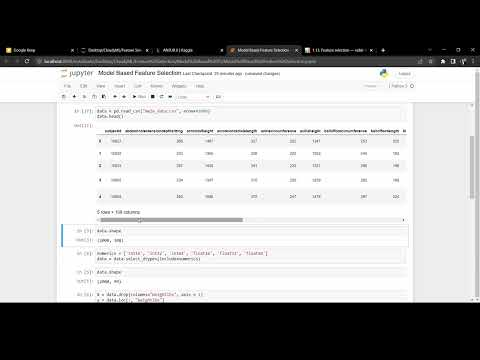

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('eha6xiDY41U',width=700, height=400)

Feature selection using Random forest comes under the category of Embedded methods. Embedded methods combine the qualities of filter and wrapper methods. They are implemented by algorithms that have their own built-in feature selection methods. Some of the benefits of embedded methods are :
1. They are highly accurate.
2. They generalize better.
3. They are interpretable

In [84]:
#Importing libraries pd, RandomForestClassifier, SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier



In [85]:
# load the csv file using pandas and print the head values
diabetes = pd.read_csv('/content/diabetes.csv')

# print head
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In all feature selection procedures, it is a good practice to select the features by examining only the training set. This is to avoid overfitting.
So considering we have a train and a test dataset. We select the features from the train set and then transfer the changes to the test set later

In [86]:
# assign features to X and target 'outcome' to Y(Think why the 'outcome' column is taken as the target)
X = diabetes.drop('Outcome' , axis=1)
Y = diabetes['Outcome']

In [88]:
# import test_train_split module
from sklearn.model_selection import train_test_split

# splitting of dataset(test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)


Here We will do the model fitting and feature selection altogether in one line of code.

Firstly, specify the random forest instance, indicating the number of trees.

Then use selectFromModel object from sklearn to automatically select the features. Simple right?. Don't worry trust your code. It helps.

Reference link to use selectFromModel: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [89]:
#create an instance of Select from Model. Pass an object of Random Forest Classifier with n_estimators=100 as argument. 
sel = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100))


# fit sel on X and y 

sel.fit(X,Y)

SelectFromModel(estimator=RandomForestClassifier())

SelectFromModel will select those features which importance is greater than the mean importance of all the features by default, but we can alter this threshold if we want.

 To see which features are important we can use get_support method on the fitted model.

In [90]:
# Using sel.get_support() print the boolean values for the features selected. 
sel.get_support()



array([False,  True, False, False, False,  True,  True,  True])

In [96]:
X.columns[sel.get_support()==True]

Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [97]:
#make a list named selected_feat with all columns which are True
selected_feat = X.columns[sel.get_support()==True]

# print length of selected_feat
len(selected_feat)

4

In [98]:
# Print selected_feat
print(selected_feat)

Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


Well done Champ!. Let us impliment SelectFromModel using LinearSVC model also

## Feature selection using SelectFromModel

<p style='text-align: right;'> 25 points</p>


SelectFromModel is a meta-transformer that can be used along with any estimator that has a coef_ or featureimportances attribute after fitting. The features are considered unimportant and removed, if the corresponding coef_ or featureimportances values are below the provided threshold parameter. Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument. Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”.

Lets use selectfrommodel again with LinearSVC

In [99]:
# import libraries LinearSVC, SelectFromModel , and dependencies

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [100]:
#Use SelectFromModel with LinearSVC() as its parameter and save it in variable 'm'

m = SelectFromModel(estimator=LinearSVC())

# fit on X, y

m.fit(X,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SelectFromModel(estimator=LinearSVC())

In [101]:
m.get_support()

array([ True, False, False, False, False, False,  True, False])

In [102]:
#make a list named selected_feat with all columns which are supported and count the selected features.

selected_feat = X.columns[m.get_support()==True]

# print selected_feat
selected_feat


Index(['Pregnancies', 'DiabetesPedigreeFunction'], dtype='object')

 # 4. Handling Multicollinearity with VIF
 
 <p style='text-align: right;'> 15 points</p>


Multicollinearity refers to a situation in which more than two explanatory variables in a multiple regression model are highly linearly related. We have perfect multicollinearity if, for example as in the equation above, the correlation between two independent variables is equal to 1 or −1.

Variance inflation factor measures how much the behavior (variance) of an independent variable is influenced, or inflated, by its interaction/correlation with the other independent variables.

VIF has big defination but for now understand that:-
Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables

## **`Video 8: VIF`**

File : https://drive.google.com/file/d/1j1npRRM9iu_m61ElAdSHaP5mftNtGHQc/view?usp=sharing

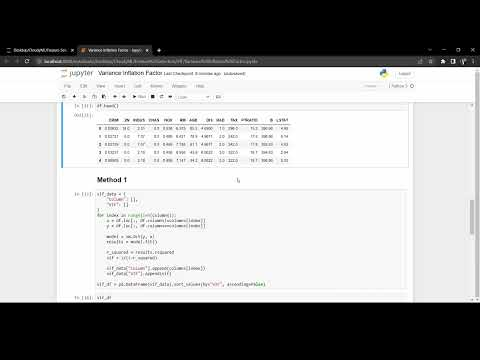

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZOjZqrDQIS0',width=700, height=400)

In [ ]:
#load and read the diabetes_cleaned.csv file using pandas and print the head values
dia_df =

# print dia_df



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,218.937760,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.189298,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,269.968908,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [ ]:
# describe the dataframe using .describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.539062,72.405184,29.108073,152.222767,32.307682,0.471876,33.240885,0.348958
std,3.369578,30.490660,12.096346,8.791221,97.387162,6.986674,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,-17.757186,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,89.647494,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,130.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,188.448695,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we can see range of these features are very different that means they all are in different scales so lets standardize the features using sklearn's scale function.

reference doc: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [ ]:
# import preprocessing
from sklearn import preprocessing

#iterate over all features in dia_df and scale

for i in dia_df:
    dia_df[[i]]= # code here

In [ ]:
# describe dataframe using .describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,6.013708e-17,-7.517135e-18,1.163710e-17,-2.352719e-17,-4.192248e-18,8.745898e-18,3.715199e-17,-9.107298e-18,2.353442e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.544700e+00,-4.004245e+00,-2.516429e+00,-1.746542e+00,-2.020543e+00,-1.189553e+00,-1.041549e+00,-7.321202e-01
25%,-8.448851e-01,-7.396938e-01,-6.953060e-01,-4.675972e-01,-6.429600e-01,-7.172147e-01,-6.889685e-01,-7.862862e-01,-7.321202e-01
50%,-2.509521e-01,-1.489643e-01,-1.675912e-02,-1.230129e-02,-2.283386e-01,-4.406715e-02,-3.001282e-01,-3.608474e-01,-7.321202e-01
75%,6.399473e-01,6.140612e-01,6.282695e-01,3.291706e-01,3.722209e-01,6.147581e-01,4.662269e-01,6.602056e-01,1.365896e+00
max,3.906578e+00,2.542136e+00,4.102655e+00,7.955377e+00,7.128551e+00,4.983056e+00,5.883565e+00,4.063716e+00,1.365896e+00


In [ ]:
# import train_test_split



In [ ]:
#import variance inflation factor 



In [ ]:
# assign features to X and target to Y by analyzing which columns to be dropped and which is to be considered as target
X = 
Y =



# split the data to test and train with test_size=0.2
x_train,x_test,y_train,y_test = 


In [ ]:
#assign an empty dataframe to variable vif
vif =

# make a new column 'VIF Factor' in vif dataframe and calculate the variance_inflation_factor for each X 
vif['VIF Factor'] = 


In [ ]:
# define vif['Features'] with columns names in X



In [ ]:
#  round off all the decimal values in the dataframe to 2 decimal places for VIF dataframe




,VIF Factor,Features
0,1.43,Pregnancies
1,2.07,Glucose
2,1.24,BloodPressure
3,1.43,SkinThickness
4,2.04,Insulin
5,1.58,BMI
6,1.05,DiabetesPedigreeFunction
7,1.62,Age


* VIF = 1: Not correlated
* VIF =1-5: Moderately correlated
* VIF >5: Highly correlated

Glucose, Insulin, and Age are having large VIF scores, so lets drop it.



In [ ]:
# according to above observation , drop  'Glucose', 'Insulin' and 'Age' from X
X = 



Now again we calculate the VIF for the rest of the features

Again repeat the previous steps to assign an empty dataframe() to vif and make a new column 'VIF Factor' and calculate the variance_inflation_factorfor each X 


In [ ]:
# create an empty df
vif =

# make a new column 'VIF Factor' and calculate the variance_inflation_factorfor each X
vif['VIF Factor'] = 




In [ ]:
#define vif['Features'] as columns of X and return vif with round off to 2 decimal places
vif['Features'] = 
vif['Features'] = 

# round up to 2 
vif.round(2)

,VIF Factor,Features
0,1.05,Pregnancies
1,1.13,BloodPressure
2,1.42,SkinThickness
3,1.50,BMI
4,1.03,DiabetesPedigreeFunction


So now colinearity of features has been reduced using VIF.


The need to fix multicollinearity depends primarily on the below reasons:
---

1. When you care more about how much each individual feature rather than a group of features affects the target variable, then removing multicollinearity may be a good option

2. If multicollinearity is not present in the features you are interested in, then multicollinearity may not be a problem.

## **`Summary:`**

1. In the feature selection assignment, we learnt the methods which we use to find best features i.e. filter methods, wrapper methods and embedded methods.

2. In the filter methods, we learnt Chi2 test, Anova test, variance threshold and missing value ratio threshold.

3. In the wrapper method, we learnt forward selection, backward elimination and recursive feature elimination techniques.

4. In the embedded method, we create subsets of features and choose the best subset to train the model.

## **`Conclusion:`**
Feature selection is a very important step in the construction of Machine Learning models. <br>

It can speed up training time, make our models simpler, easier to debug, and reduce the time to market of Machine Learning products. 

------------------------------

# Hip Hip Hurray! Congratulations you have completed the 7th assignment too! Very well done.

-------------------------------------

# Its Feedback Time!

We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.


---
**Please fill this feedback form**<br>

https://forms.gle/VfxaKpjnmim8m4Yv8

------------------------------